## The Spark Foundation Internship 
### Prediction using Supervised ML 
#### By Sandeep Rana

In [10]:
# importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
# importing libraries for building models
import statsmodels
import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Step 1: Reading and Understanding Data

In [12]:
student = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [13]:
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
student.shape

(25, 2)

In [15]:
student.info() # to check the meta data and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
student.describe() # to check the statistical information about the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 2: Exploratory Data Analysis 

- Data visualisation

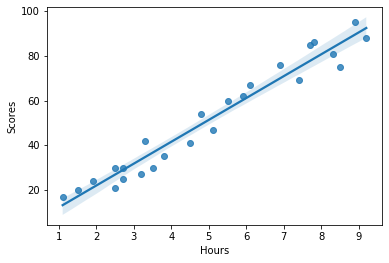

In [17]:
sns.regplot(x='Hours', y='Scores', data= student)
plt.show()

We can observe that the data linear characteristics and it is fitting perfectly around a line hence we can use linear regression in this problem.

In [18]:
# Lets check the correlation between Hours and Scores
student.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


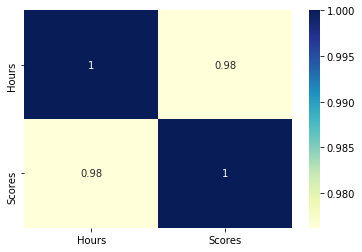

In [19]:
sns.heatmap(student.corr(),cmap="YlGnBu", annot= True)
plt.show()

We can see that there is a strong positive correlation between 'Hours' and 'Score' i.e. if study hours increases marks also increases. 

### Step 3: Model Building

#### Linear regression equation y= m1 x TV + c (m is called the model parameters or model coefficients)

## Steps:
- Create X and y
- Create train and test sets(70-30)
- Train the model on the training set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)

In [20]:
X= student['Hours']
y= student['Scores']

In [21]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =0.7, random_state = 20)

In [22]:
X_train.shape

(17,)

In [23]:
X_test.shape

(8,)

In [24]:
X_train

22    3.8
6     9.2
17    1.9
24    7.8
21    4.8
14    1.1
10    7.7
5     1.5
8     8.3
0     2.5
2     3.2
7     5.5
11    5.9
20    2.7
9     2.7
15    8.9
3     8.5
Name: Hours, dtype: float64

Training the model

In [25]:
# adding constant
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,Hours
22,1.0,3.8
6,1.0,9.2
17,1.0,1.9
24,1.0,7.8
21,1.0,4.8


In [26]:
# Fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params # to see the parameters of the model

const    2.421308
Hours    9.812067
dtype: float64

y= 9.18*X + 2.42 is our linear model that we got from Statsmodels

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     409.0
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           2.68e-12
Time:                        23:07:26   Log-Likelihood:                -52.185
No. Observations:                  17   AIC:                             108.4
Df Residuals:                      15   BIC:                             110.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4213      2.799      0.865      0.401      -3.545       8.387
Hours          9.8121      0.485     20.224      0.000       8.778      10.846
==============================================================================
Omnibus:                        1.712   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.204
Skew:                          -0.416   Prob(JB):                        0.548
Kurtosis:                       1.995   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can see that r2 and adjusted r2 both are similar and > .96 and P value is also 0 hence we can conclude that our model is performing well on the test data

In [28]:
# Lets check the predicted values
y_train_pred = lr_model.predict(X_train_sm)

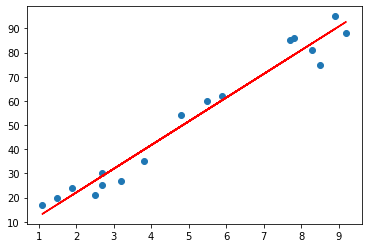

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r'  ) # red line is the predicted and blue points are the actual
plt.show()

In [30]:
y_train_pred

22    39.707163
6     92.692324
17    21.064236
24    78.955431
21    49.519230
14    13.214582
10    77.974224
5     17.139409
8     83.861464
0     26.951476
2     33.819923
7     56.387677
11    60.312503
20    28.913889
9     28.913889
15    89.748704
3     85.823877
dtype: float64

### Step 4 : Residual Analysis

In [31]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Plot')

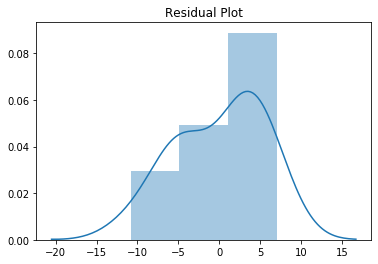

In [32]:
# Plot the residual
plt.figure()
sns.distplot(res)
plt.title('Residual Plot') # we can see that the errors are almost normally distributed, since our data set was small, we didn't get a proper normal distribution curve.

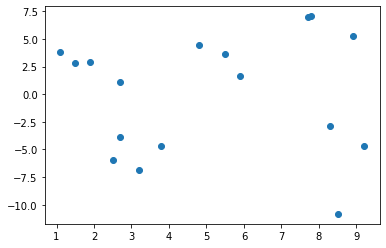

In [33]:
# look for patterns in residuals (there should not be any pattern ideally)
plt.scatter(X_train, res)
plt.show()

We can see that there is no pattern in the residuals. 

### Step 5: Predict the evaluation on the Test set

In [34]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [35]:
r2_test = r2_score(y_true= y_test, y_pred= y_test_pred)
r2_test

0.8854976232318078

In [36]:
r2_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_train

0.9646241283293752

In [37]:
# we can see that for training the r2 score is 96.46 % while for test it is 88.5 %
# since test r2 is more than 80% and it is close to training r2 hence we can say that our model is performing good.

In [38]:
y_train_pred_df = pd.DataFrame({'Hours of study':X_train,'Actual marks': y_train ,'Predicted Marks':y_train_pred})
y_train_pred_df

,Hours of study,Actual marks,Predicted Marks
22,3.8,35,39.707163
6,9.2,88,92.692324
17,1.9,24,21.064236
24,7.8,86,78.955431
21,4.8,54,49.519230
14,1.1,17,13.214582
10,7.7,85,77.974224
5,1.5,20,17.139409
8,8.3,81,83.861464
0,2.5,21,26.951476


In [39]:
y_test_pred_df = pd.DataFrame({'Hours of study':X_test,'Actual marks': y_test ,'Predicted Marks':y_test_pred})
y_test_pred_df

,Hours of study,Actual marks,Predicted Marks
19,7.4,69,75.030604
23,6.9,76,70.124570
12,4.5,41,46.575610
4,3.5,30,36.763543
18,6.1,67,62.274917
1,5.1,47,52.462850
13,3.3,42,34.801129
16,2.5,30,26.951476


### What will be the predicted score if a student studies for 9.25 hrs/day 

In [48]:
hours =9.25
hrs = sm.add_constant(pd.DataFrame({'Hours od study':[hours]}),has_constant='add')                   

In [49]:
hrs.shape

(1, 2)

In [50]:
scores = lr_model.predict(hrs)
print(scores)

0    93.182928
dtype: float64


#### Final Model

Scores= 9.18*Hours + 2.42 